In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Import necessary libraries
import pandas as pd

# Use Google Colab's file upload widget
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

# Load the uploaded file into a pandas dataframe
file_path = next(iter(uploaded))  # Get the uploaded file name
df = pd.read_excel(file_path)  # Read the Excel file

# Display the first few rows of the dataframe
df.head()


Saving SC-subjects.xls to SC-subjects (1).xls


,subject,night,age,sex (F=1),LightsOff
0,0,1,33,1,00:38:00
1,0,2,33,1,21:57:00
2,1,1,33,1,22:44:00
3,1,2,33,1,22:15:00
4,2,1,26,1,22:50:00


In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Upload and Load the Dataset
uploaded = files.upload()  # This will prompt you to upload your file
file_path = next(iter(uploaded))  # Get the uploaded file name
df = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Step 2: Preprocess the Data
# Convert 'LightsOff' (which is a time object) to seconds since midnight
df['LightsOff_seconds'] = df['LightsOff'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Standardize the 'age' and 'LightsOff_seconds' features
scaler = StandardScaler()
df[['age', 'LightsOff_seconds']] = scaler.fit_transform(df[['age', 'LightsOff_seconds']])

# Assume 'sex (F=1)' as a feature and that we have a binary target variable 'depression' for simplicity
# For demonstration, we will create a synthetic target variable based on some condition
# In real scenarios, you'd replace this with actual labels
df['depression'] = (df['age'] > 0.5) & (df['LightsOff_seconds'] > 0)  # Example condition for target

# Step 3: Split the Data into Train and Test Sets
X = df[['age', 'LightsOff_seconds', 'sex (F=1)']]  # Features
y = df['depression']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Saving SC-subjects.xls to SC-subjects (2).xls
Accuracy: 0.9565217391304348
Confusion Matrix:
 [[34  0]
 [ 2 10]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97        34
        True       1.00      0.83      0.91        12

    accuracy                           0.96        46
   macro avg       0.97      0.92      0.94        46
weighted avg       0.96      0.96      0.96        46



Accuracy: 1.0
Confusion Matrix:
 [[34  0]
 [ 0 12]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        34
        True       1.00      1.00      1.00        12

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



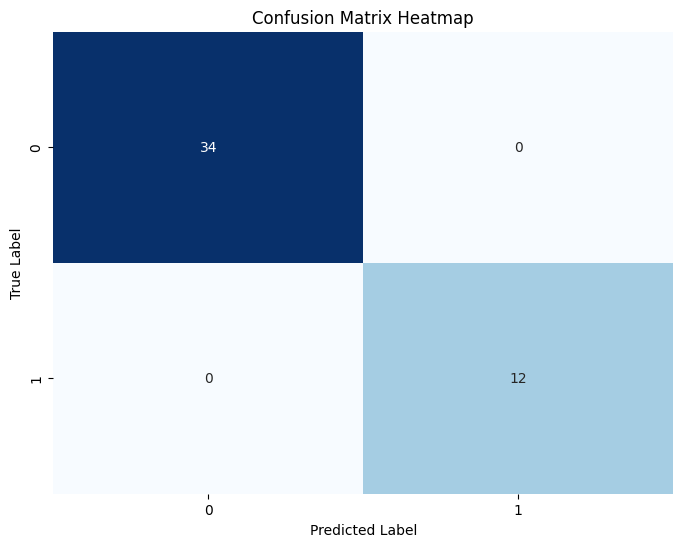

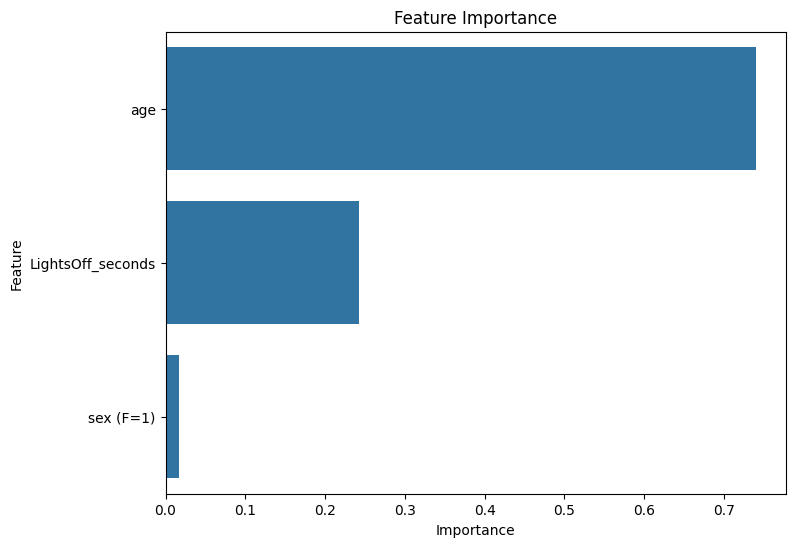

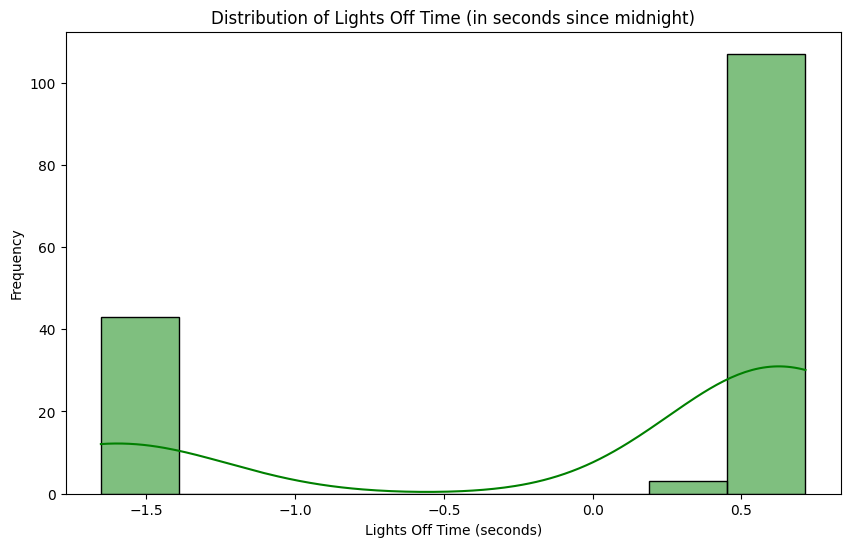

In [ ]:
# Step 1: Prepare the features and target variable
# Assuming 'depression' is a binary target variable already defined in your DataFrame
X = df[['age', 'LightsOff_seconds', 'sex (F=1)']]  # Features
y = df['depression']  # Target variable

# Step 2: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Step 5: Plot Related Graphs
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance Plot
feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Distribution of LightsOff Time
plt.figure(figsize=(10, 6))
sns.histplot(df['LightsOff_seconds'], kde=True, color='green')
plt.title("Distribution of Lights Off Time (in seconds since midnight)")
plt.xlabel("Lights Off Time (seconds)")
plt.ylabel("Frequency")
plt.show()


SVM Accuracy: 0.9565217391304348
SVM Confusion Matrix:
 [[34  0]
 [ 2 10]]
SVM Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97        34
        True       1.00      0.83      0.91        12

    accuracy                           0.96        46
   macro avg       0.97      0.92      0.94        46
weighted avg       0.96      0.96      0.96        46



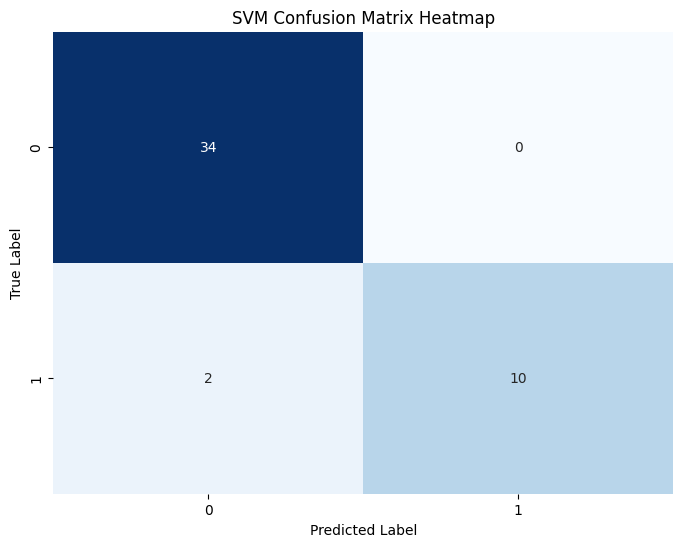

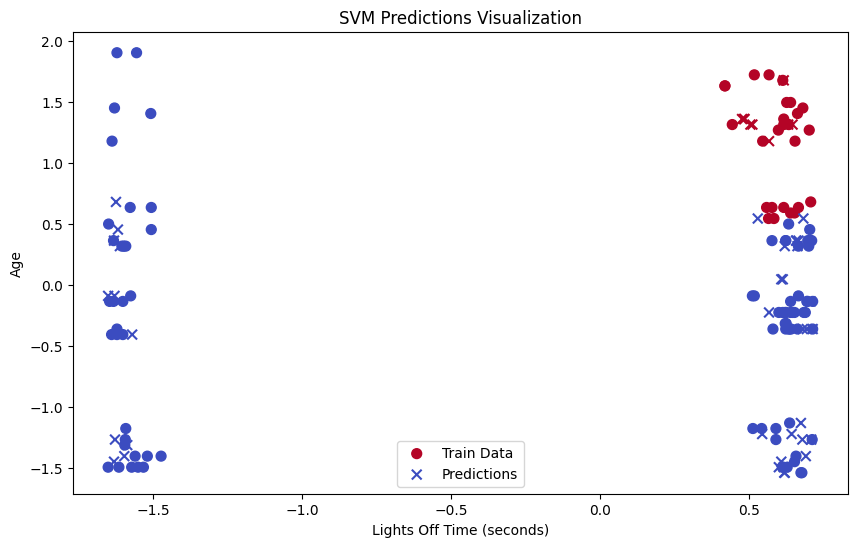

In [ ]:
# Import necessary libraries (if not already done)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already uploaded the dataset and preprocessed it

# Step 1: Prepare the features and target variable
X = df[['age', 'LightsOff_seconds', 'sex (F=1)']]  # Features
y = df['depression']  # Target variable (Make sure this column exists)

# Step 2: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Support Vector Machine Model
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate the Model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation results for SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", class_report_svm)

# Step 5: Plot Related Graphs
# Confusion Matrix Heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance Plot (not directly applicable to SVM)
plt.figure(figsize=(10, 6))
plt.scatter(X_train['LightsOff_seconds'], X_train['age'], c=y_train, s=50, cmap='coolwarm', label='Train Data')
plt.scatter(X_test['LightsOff_seconds'], X_test['age'], c=y_pred_svm, s=50, marker='x', cmap='coolwarm', label='Predictions')
plt.title("SVM Predictions Visualization")
plt.xlabel("Lights Off Time (seconds)")
plt.ylabel("Age")
plt.legend()
plt.show()


In [ ]:
import pickle

# Save the model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


In [ ]:
# Load the model
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)


In [ ]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Load the Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
import pickle

# Save the Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
# Load the Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
